### Reading the data 

First we have to read our car sales data from the CSV file into a Pandas dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# This line requires the car sales data to be located in a folder called data in the same directory as the notebook
car_data = pd.read_csv("./data/car_sales.csv", low_memory=False)

Now, let's take a first look at how our data looks like.

In [2]:
car_data.head()

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Price,Seat_num,Door_num
0,Bentley,Arnage,10_1,10_1$$1,2018,4,Silver,2000.0,Saloon,60000,6.8L,Automatic,Petrol,21500,5.0,4.0
1,Bentley,Arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000,6.8L,Automatic,Petrol,28750,5.0,4.0
2,Bentley,Arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000,6.8L,Automatic,Petrol,29999,5.0,4.0
3,Bentley,Arnage,10_1,10_1$$4,2018,4,Green,2003.0,Saloon,14000,6.8L,Automatic,Petrol,34948,5.0,4.0
4,Bentley,Arnage,10_1,10_1$$5,2017,11,Grey,2003.0,Saloon,61652,6.8L,Automatic,Petrol,26555,5.0,4.0


### Initial cleanup and analysis of the data

For covenience, we will set all of the column names to lowercase.

In [3]:
car_data.columns = car_data.columns.str.lower()

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   maker         268255 non-null  object 
 1   genmodel      268255 non-null  object 
 2   genmodel_id   268255 non-null  object 
 3   adv_id        268255 non-null  object 
 4   adv_year      268255 non-null  int64  
 5   adv_month     268255 non-null  int64  
 6   color         246380 non-null  object 
 7   reg_year      268248 non-null  float64
 8   bodytype      267301 non-null  object 
 9   runned_miles  267200 non-null  object 
 10  engin_size    266191 non-null  object 
 11  gearbox       268088 non-null  object 
 12  fuel_type     267846 non-null  object 
 13  price         268255 non-null  object 
 14  seat_num      261781 non-null  float64
 15  door_num      263702 non-null  float64
dtypes: float64(3), int64(2), object(11)
memory usage: 32.7+ MB


In [5]:
car_data.shape

(268255, 16)

From the above we can see that our dataset consists of 16 columns and 268255 rows. Furthermore, we can see that we have 11 attributes of type *object*, 3 attributes of type *float64*, and 2 attributes of type *int64*. Straightaway we can drop columns **genmodel_id**, **adv_id**.

In [6]:
car_data = car_data.drop(columns=["genmodel_id", "adv_id"])

In a few cases, it seems that there has been a conversion issue while reading from the CSV file, as attributes such as **price** and **runned_miles** should be of numerical type instead of type *object*. Also, the *engine_size* attribute should be of numerical type, however in this case the automatic conversion to *object* type is due to the letter "L" appending the engine size in liters. We will fix these issues now. <br><br>

First let's remove the appending "L" from the **engin_size** column and convert it to a float.

In [7]:
car_data["engin_size"] = car_data["engin_size"].str.rstrip('L').astype(float)

Now let's take care of the two other issues. After taking a closer look at the values in the **price** column, we can see that there are entries with value of "Uknown". This is the reason why the automatic conversion did not work. We will fix it now.

In [8]:
car_data["price"] = pd.to_numeric(car_data["price"], errors='coerce')

The **runned_miles** column seems to have empty entries, hence to fix it we will repeat the same procedure as above:

In [9]:
car_data["runned_miles"] = pd.to_numeric(car_data["runned_miles"], errors='coerce')

Let's now examine the summary of our dataset again.

In [14]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   maker         268255 non-null  object 
 1   genmodel      268255 non-null  object 
 2   adv_year      268255 non-null  int64  
 3   adv_month     268255 non-null  int64  
 4   color         246380 non-null  object 
 5   reg_year      268248 non-null  float64
 6   bodytype      267301 non-null  object 
 7   runned_miles  266942 non-null  float64
 8   engin_size    266191 non-null  float64
 9   gearbox       268088 non-null  object 
 10  fuel_type     267846 non-null  object 
 11  price         267110 non-null  float64
 12  seat_num      261781 non-null  float64
 13  door_num      263702 non-null  float64
dtypes: float64(6), int64(2), object(6)
memory usage: 28.7+ MB


Now all the attributes that are numerical have a numerical data type. <br><br>

As a next step, let's examine the null values in each column.

In [16]:
car_data.isnull().sum()

maker               0
genmodel            0
adv_year            0
adv_month           0
color           21875
reg_year            7
bodytype          954
runned_miles     1313
engin_size       2064
gearbox           167
fuel_type         409
price            1145
seat_num         6474
door_num         4553
dtype: int64

We can see that a majority of attributes has missing values. We will have to take care of it later. <br><br>

Last but not least let's examine a summary of the numerical attributes.

In [17]:
car_data.describe()

,adv_year,adv_month,reg_year,runned_miles,engin_size,price,seat_num,door_num
count,268255.000000,268255.000000,268248.000000,2.669420e+05,266191.000000,2.671100e+05,261781.000000,263702.000000
mean,2018.127778,5.626143,2012.708430,4.816993e+04,1.963554,1.475626e+04,4.904306,4.371594
std,0.747476,2.091577,4.465705,4.184823e+04,9.362173,3.232091e+04,0.877934,1.009339
min,2012.000000,1.000000,1900.000000,0.000000e+00,0.100000,1.000000e+02,1.000000,0.000000
25%,2018.000000,4.000000,2010.000000,1.416000e+04,1.400000,4.990000e+03,5.000000,4.000000
50%,2018.000000,5.000000,2014.000000,3.929650e+04,1.800000,9.299000e+03,5.000000,5.000000
75%,2018.000000,7.000000,2016.000000,7.500000e+04,2.000000,1.715000e+04,5.000000,5.000000
max,2021.000000,33.000000,2019.000000,6.363342e+06,3500.000000,9.999999e+06,17.000000,7.000000


### Visualisation of the dataset
Now let's do some visualisations of our dataset to gain more insights into our data. We are going to start with a boxplot for all numerical attributes of our dataset.

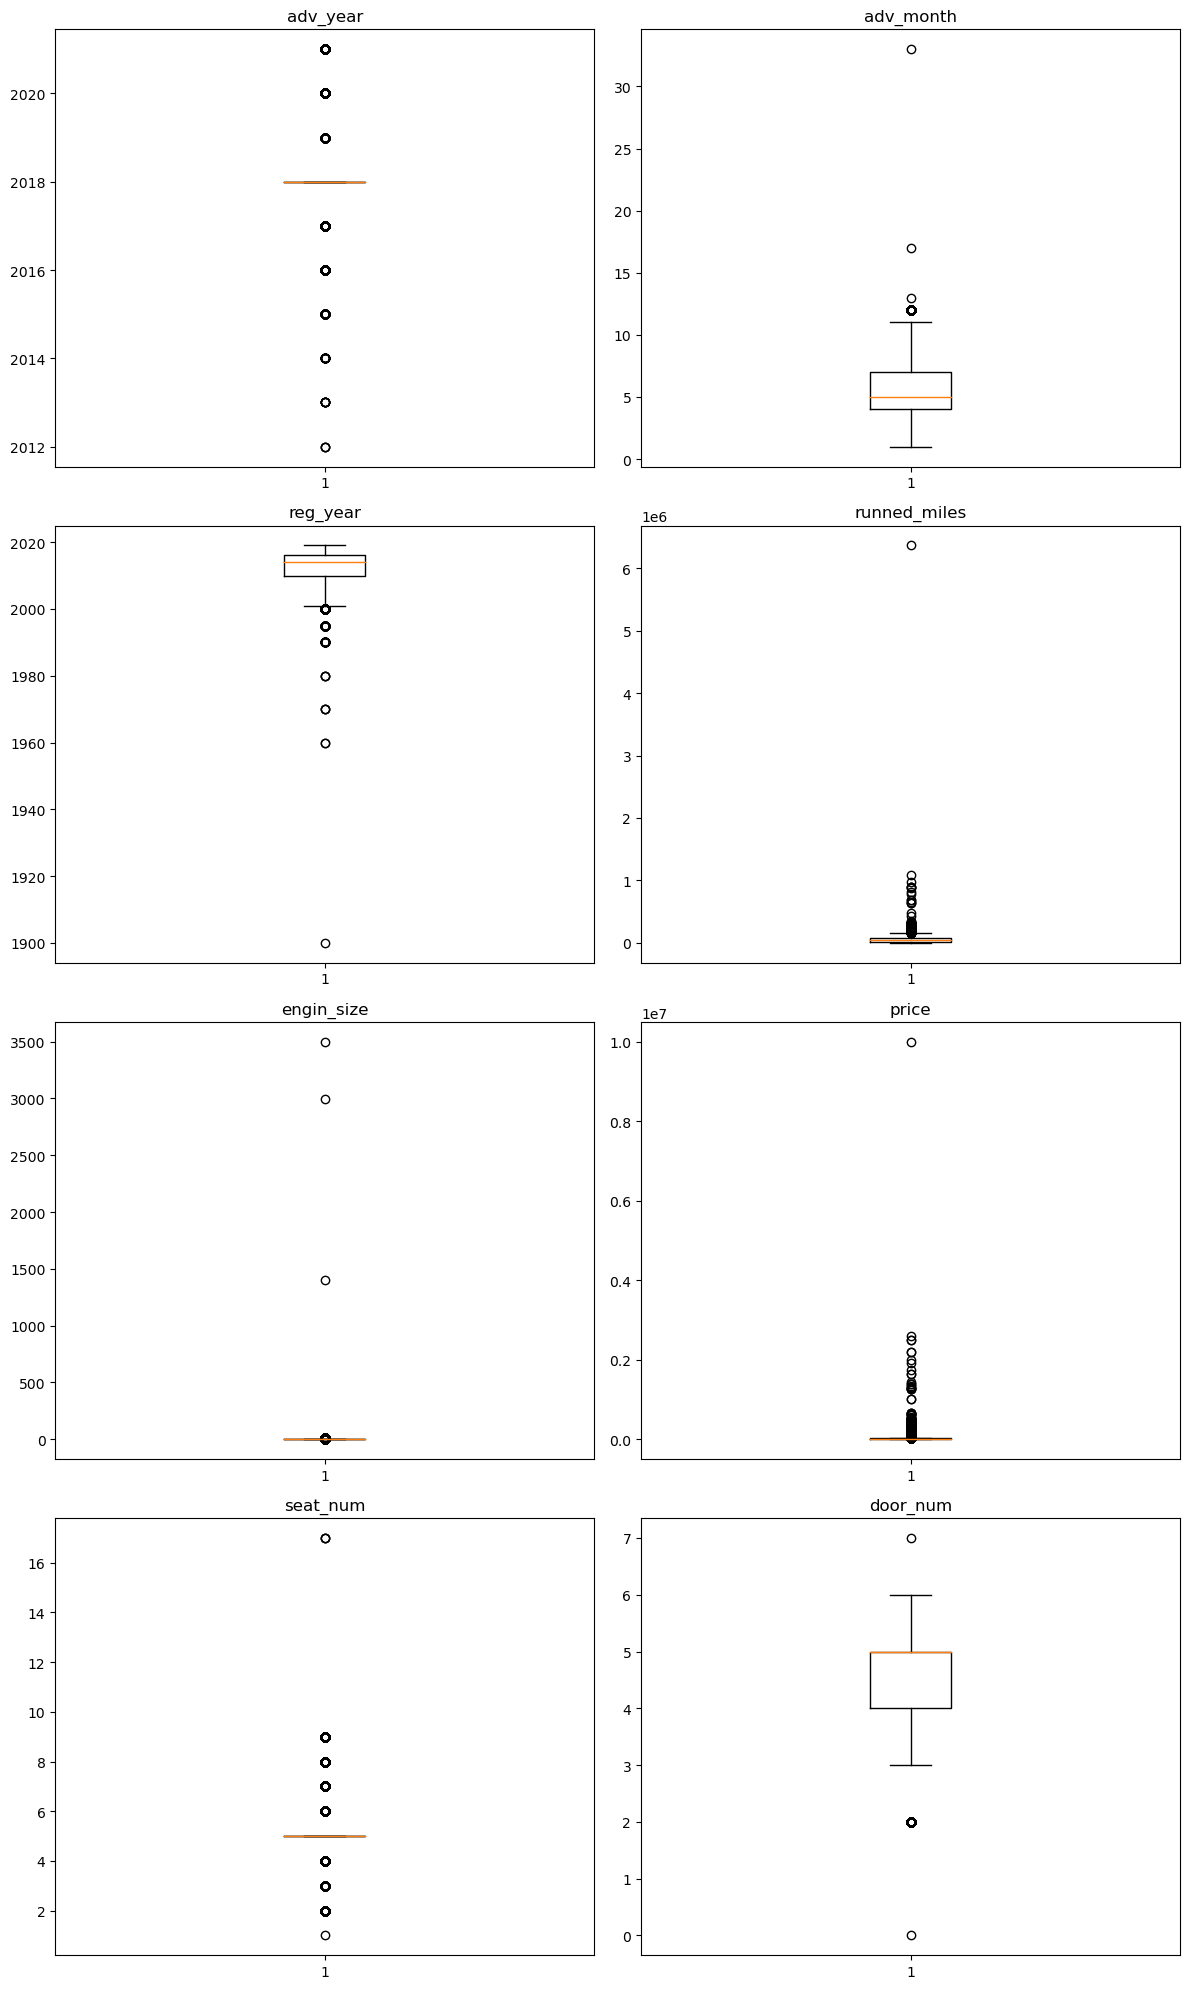

In [24]:
numerical_columns = car_data.select_dtypes(include=['float64', 'int64'])

num_columns = len(numerical_columns.columns)
num_rows = (num_columns // 2) + (num_columns % 2)

plt.figure(figsize=(12, 5 * num_rows))

for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(num_rows, 2, i)
    plt.boxplot(car_data[column].dropna())
    plt.title(column)

plt.tight_layout()
plt.show()

Looking at the figures above, we can already see that we have some odd-looking outliers in **adv_month**, **price**, **engine_size**, and **seat_num**. As for the first three attributes they are definietly outliers as the numbers just don't make sense, the last one actually does not have any outliers. It turns out that the 17 seats belong to the Mercedes Sprinter Minibus so we are good with this one. However, we have to take care of the other outliers. <br><br>

Another visualisation we can make use of is the scatter matrix, where we will be able to see if there are any promising correlations between the attributes. We will plot only a few of the attributes since plotting all of them would take up way too much space.

In [25]:
corr_matrix = car_data.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price           1.000000
reg_year        0.233995
adv_year        0.060807
engin_size      0.030928
adv_month      -0.025551
door_num       -0.106559
seat_num       -0.113511
runned_miles   -0.232481
Name: price, dtype: float64

### Extracting the test set